# Capstone Lab: Prediksi Penyakit Ikan

## Deskripsi Proyek

**Capstone Lab: Prediksi Penyakit Ikan** adalah proyek yang bertujuan untuk mengembangkan sistem prediksi penyakit pada ikan menggunakan data dan teknologi pembelajaran mesin (machine learning). Industri perikanan dan akuakultur berperan penting dalam memenuhi kebutuhan pangan global. Kesehatan ikan menjadi salah satu aspek kritis dalam menjaga produktivitas dan kualitas hasil perikanan. Dengan deteksi dini penyakit pada ikan, petani dan pengelola akuakultur dapat mengurangi risiko penyebaran penyakit, meminimalkan kerugian ekonomi, dan meningkatkan efisiensi produksi.

Dalam proyek ini, data yang relevan seperti gejala klinis, faktor lingkungan, gambar ikan yang terinfeksi, dan parameter lainnya akan diolah untuk membangun model prediksi. Proses pengembangan mencakup eksplorasi data, preprocessing, pelatihan model, evaluasi performa, serta pengoptimalan model untuk meningkatkan akurasi prediksi.

## Tujuan Utama

1. Membangun model pembelajaran mesin untuk memprediksi kemungkinan ikan terkena penyakit berdasarkan data yang tersedia.
2. Memberikan rekomendasi atau sistem peringatan dini kepada petani ikan untuk mengambil langkah pencegahan.

## Teknologi yang Digunakan

- **Python** dan pustaka pembelajaran mesin seperti **TensorFlow** dan **Keras**.
- Visualisasi data menggunakan **Matplotlib** 
- Pengolahan data citra (jika ada data gambar) dengan **CNN** 

## Manfaat Proyek

- Membantu petani ikan dan pemilik akuakultur dalam mengidentifikasi penyakit ikan.
- Mengurangi kerugian finansial akibat wabah penyakit.
- Meningkatkan efisiensi dan kualitas produk perikanan.

Dengan proyek ini, diharapkan pengelolaan kesehatan ikan dapat lebih optimal, memberikan dampak positif terhadap industri perikanan secara keseluruhan, serta memperkuat keberlanjutan dan ketahanan pangan global.

## Import Library

In [39]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [2]:
BASE_DIR = 'newdataset2'

train_dir = os.path.join(BASE_DIR, 'Train')
validation_dir = os.path.join(BASE_DIR, 'Test')

## Data Augmentasion

In [3]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1456 images belonging to 7 classes.
Found 402 images belonging to 7 classes.


## Initialisation Model With Densenet50

In [4]:
base_model = DenseNet201(weights='densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                         include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')
])

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1920)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       983,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,470,663 (74.27 MB)

 Trainable params: 19,241,607 (73.40 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [5]:
for x, y in train_generator:
    print(x.shape, y.shape)
    break

(32, 224, 224, 3) (32, 7)


In [6]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=valid_generator
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 415s 8s/step - accuracy: 0.1912 - loss: 2.0768 - val_accuracy: 0.4602 - val_loss: 1.4627
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 386s 8s/step - accuracy: 0.3964 - loss: 1.5996 - val_accuracy: 0.6269 - val_loss: 1.1528
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 389s 8s/step - accuracy: 0.5294 - loss: 1.2757 - val_accuracy: 0.7637 - val_loss: 0.8164
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 386s 8s/step - accuracy: 0.6692 - loss: 0.9490 - val_accuracy: 0.8159 - val_loss: 0.5602
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 389s 8s/step - accuracy: 0.7789 - loss: 0.6488 - val_accuracy: 0.8657 - val_loss: 0.4115
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 389s 8s/step - accuracy: 0.8574 - loss: 0.4534 - val_accuracy: 0.8557 - val_loss: 0.4568
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 387s 8s/step - accuracy: 0.8965 - loss: 0.3387 - val_accuracy: 0.8856 - val_loss: 0.3616
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 388s 8s/step - accuracy: 0.9510 - loss: 0.1802 - val_accuracy: 0.

## Visualization

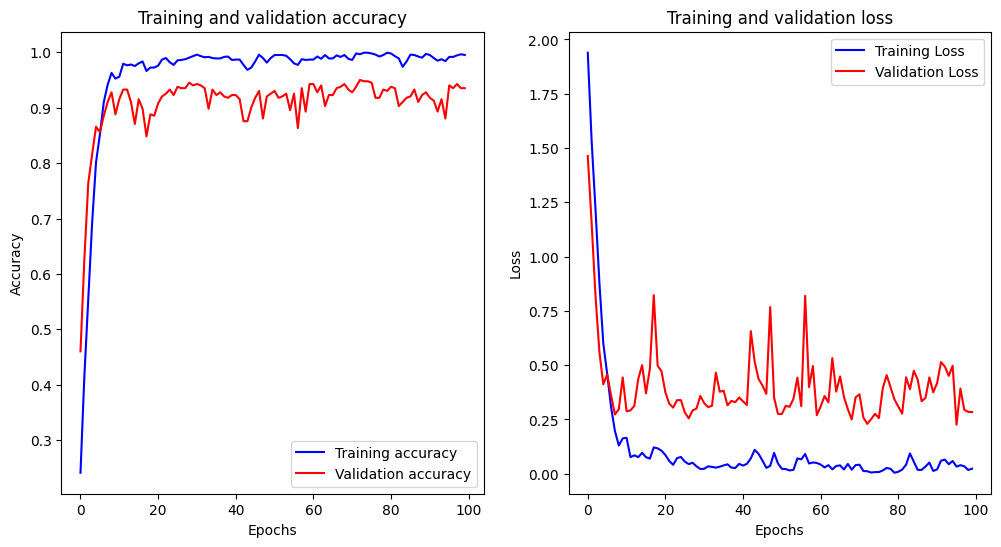

In [44]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'b-', label='Training accuracy')  
    ax[0].plot(epochs, val_acc, 'r-', label='Validation accuracy')  
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    
    ax[1].plot(epochs, loss, 'b-', label='Training Loss')  
    ax[1].plot(epochs, val_loss, 'r-', label='Validation Loss')  
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()
    
    plt.show()

plot_loss_acc(history)


**save to h.5**

In [8]:
model.save('ifishy_disease_model.h5')

## Test Prediction

In [51]:
load_model = tf.keras.models.load_model('ifishy_disease_model.h5')
def predict_and_display(image_path, load_model, class_labels):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    predictions = load_model.predict(img_array)
    predicted_class = np.argmax(predictions)

    print(f"Predicted Class: {class_labels[predicted_class]}")
    plt.imshow(img)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
Predicted Class: Bacterial diseases - Aeromoniasis


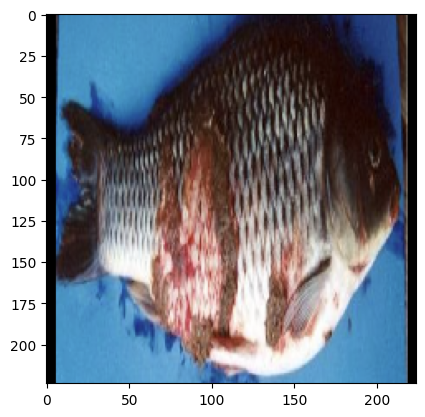

In [63]:
class_labels = {
    0: 'Bacterial diseases - Aeromoniasis',
    1: 'Bacterial gill disease',
    2: 'Bacterial Red disease',
    3: 'Fungal diseases Saprolegniasis',
    4: 'Healthy Fish',
    5: 'Parasitic diseases',
    6: 'Viral diseases White tail disease'
}
sample_image_path = 'test_model/test_aeromon.png'
predict_and_display(sample_image_path, load_model, class_labels)